<a href="https://colab.research.google.com/github/sidhu2690/GEANT4/blob/main/00_HGCAL_Layer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Total number of placed cells: 952


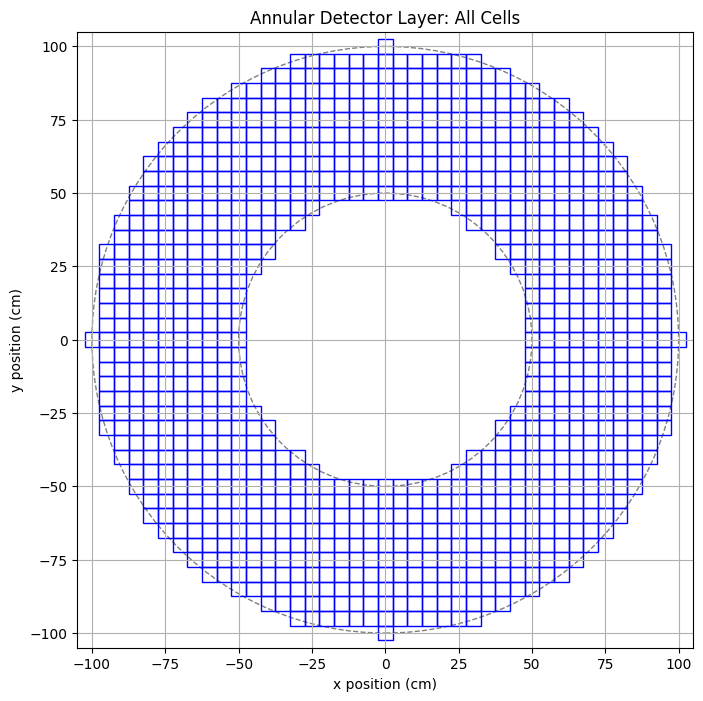

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import math

# ---------------------
# Parameters
# ---------------------
cellSize = 5.0          # cm
innerRadius = 50.0       # cm
outerRadius = 100.0      # cm

numCellsAlongRadius = int(outerRadius / cellSize)

# ---------------------
# Generate all pixel centers
# ---------------------
positions = []
for ix in range(-numCellsAlongRadius, numCellsAlongRadius + 1):
    for iy in range(-numCellsAlongRadius, numCellsAlongRadius + 1):
        xPos = ix * cellSize
        yPos = iy * cellSize
        r = math.sqrt(xPos**2 + yPos**2)
        if innerRadius <= r <= outerRadius:
            positions.append((xPos, yPos))

positions = np.array(positions)
xs_all = positions[:,0]
ys_all = positions[:,1]
total_cells = len(xs_all)
print(f"Total number of placed cells: {total_cells}")

# ---------------------
# Plot all cells
# ---------------------
fig, ax = plt.subplots(figsize=(8,8))
ax.set_aspect('equal', adjustable='box')
ax.set_xlim(-outerRadius - cellSize, outerRadius + cellSize)
ax.set_ylim(-outerRadius - cellSize, outerRadius + cellSize)
ax.set_title("Annular Detector Layer: All Cells")
ax.set_xlabel("x position (cm)")
ax.set_ylabel("y position (cm)")
ax.grid(True)

# Draw annulus outlines
circle_outer = plt.Circle((0,0), outerRadius, fill=False, linestyle='--', color='gray')
circle_inner = plt.Circle((0,0), innerRadius, fill=False, linestyle='--', color='gray')
ax.add_patch(circle_outer)
ax.add_patch(circle_inner)

# Draw rectangles
for xc, yc in positions:
    rect = plt.Rectangle((xc - cellSize/2, yc - cellSize/2),
                         cellSize, cellSize,
                         edgecolor='blue', facecolor='none', linewidth=1)
    ax.add_patch(rect)

plt.show()
